In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

/Users/leejaeyoon/anaconda3/envs/sample/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/leejaeyoon/anaconda3/envs/sample/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/leejaeyoon/anaconda3/envs/sample/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/leejaeyoon/anaconda3/env

In [2]:
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)


print("훈련 이미지 :",  mnist.train.images.shape)
print("훈련 라벨:",  mnist.train.labels.shape)
print("테스트 이미지 : ", mnist.test.images.shape)
print("테스트 라벨 : ", mnist.test.labels.shape)
print("검증 이미지 : ", mnist.validation.images.shape)
print("검증 라벨 : ", mnist.validation.labels.shape)
print('\n')

mnist_idx = 200

print('[label]')
print('one-hot vector label = ', mnist.train.labels[mnist_idx])
print('number label = ', np.argmax(mnist.train.labels[mnist_idx]))
print('\n')
#
# print('[image]')
#
for index, pixel in enumerate(mnist.train.images[mnist_idx]):
    if index % 28 == 0:
        print('\n')
    else:
        print("%10f" % pixel, end="")
print('\n')

# plt.figure(figsize=(5, 5))
# image = np.reshape(mnist.train.images[mnist_idx], [28, 28])
# plt.imshow(image, cmap='Greys')
# plt.imshow(image)
# plt.show()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [3]:
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# 10개의 값 중 가장 확률이 높은 것을 고르기 위해 Softmax 사용
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 50
batch_size = 500
num_iterations = int(mnist.train.num_examples / batch_size)



Epoch: 0001, Cost: 2.734111586
Epoch: 0002, Cost: 1.065672335
Epoch: 0003, Cost: 0.846898410
Epoch: 0004, Cost: 0.745006731
Epoch: 0005, Cost: 0.678789434
Epoch: 0006, Cost: 0.632404741
Epoch: 0007, Cost: 0.597531744
Epoch: 0008, Cost: 0.569244522
Epoch: 0009, Cost: 0.546311115
Epoch: 0010, Cost: 0.526741007
Epoch: 0011, Cost: 0.509596388
Epoch: 0012, Cost: 0.494642904
Epoch: 0013, Cost: 0.481903804
Epoch: 0014, Cost: 0.470610148
Epoch: 0015, Cost: 0.460421158
Epoch: 0016, Cost: 0.450623022
Epoch: 0017, Cost: 0.442462348
Epoch: 0018, Cost: 0.434583341
Epoch: 0019, Cost: 0.426871039
Epoch: 0020, Cost: 0.420068628
Epoch: 0021, Cost: 0.414161840
Epoch: 0022, Cost: 0.408748515
Epoch: 0023, Cost: 0.402768600
Epoch: 0024, Cost: 0.397848718
Epoch: 0025, Cost: 0.393144911
Epoch: 0026, Cost: 0.388273152
Epoch: 0027, Cost: 0.384343237
Epoch: 0028, Cost: 0.380684265
Epoch: 0029, Cost: 0.376506288
Epoch: 0030, Cost: 0.372637319
Epoch: 0031, Cost: 0.369392475
Epoch: 0032, Cost: 0.365995665
Epoch: 0

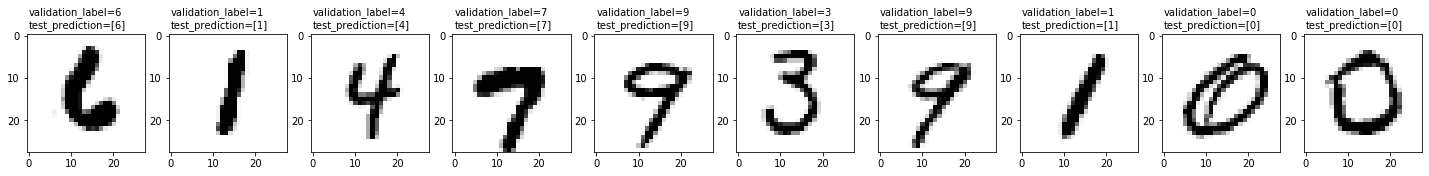

In [4]:

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    correct_vals = sess.run(tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)), feed_dict={X: mnist.test.images, Y: mnist.test.labels})
    print ('전체 테스트 데이터', len(correct_vals), '중에 정답수:', len(correct_vals[correct_vals == True]), ', 오답수:', len(correct_vals[correct_vals == False]))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    print("\n\n===================검증 데이터를 통한 결과 확인===========================================\n\n")

    fig = plt.figure(figsize=(25, 5))
    for i in range(10):
        n = random.randint(0, mnist.validation.num_examples - 1)
        # validation_label = sess.run(tf.argmax(mnist.validation.labels[n : n + 1], 1))
        validation_label = np.argmax(mnist.validation.labels[n])
        test_prediction = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.validation.images[n: n+1]})

        print("label : {} , prediction : {}".format(validation_label, test_prediction))

        ax = fig.add_subplot(1, 10, i+1)
        im = np.reshape(mnist.validation.images[n], [28, 28])
        ax.imshow(im, cmap='Greys')
        ax.text(0, -2, 'validation_label=' + str(validation_label) + '\ntest_prediction=' + str(test_prediction))

        # plt.figure(figsize=(5, 5))
        # plt.imshow(
        #     mnist.validation.images[n : n + 1].reshape(28, 28),
        #     cmap="Greys",
        #     interpolation="nearest"
        # )
    plt.show()
    sess.close()